In [4]:
import numpy as np
import pandas as pd
import datetime as dt
from dateutil.relativedelta import relativedelta
from tezcatli_scripts import load_data, utils, pre_process , write_to_database as w2d #, get_ts_features , fit_models,
from tezcatli_scripts.fit_models import  Darts, Orbit

### For tracking execution times
from os import path
import time
#import random
from random import getrandbits, seed
import pickle

#For reading options from command line
import sys, getopt

import warnings
import matplotlib.pyplot as plt

# plt.rcParams['figure.figsize'] = [20,6]
# pd.set_option('display.max_columns',12)
# pd.set_option('display.width', 1000)

/home/shahid/anaconda3/envs/jameshardie/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [141]:
# df=pd.read_parquet('results/runid434425863_forecast_all_df.pkl')
import pickle

# Load the pickled model from the file
with open('data/runid515327118_forecast_all_df.pkl', 'rb') as f:
    df = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'data/runid515327118_forecast_all_df.pkl'

In [142]:
df=pd.read_parquet('data/tezcatli_orders_data.parquet')

In [153]:
df2=df2.loc[df2['Region Name']!='Export/Interco']

In [151]:
df2=df.loc[df['Product Segment'].isin(['Exterior','Interior'])]

In [145]:
df2['Order Create Date']=pd.to_datetime(df2['Order Create Date'])

/home/shahid/anaconda3/envs/jameshardie/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [154]:
df2['Region Name'].unique()

array(['Carolinas', 'Canada East', 'Canada West', 'Mid Atlantic',
       'Mid South', 'Midwest Central', 'Midwest East', 'Midwest West',
       'Mountain', 'North Atlantic', 'Pacific Northwest', 'Southeast',
       'Southwest', 'Texas and South Plains', 'Alaska'], dtype=object)

In [159]:
df2['forecast_group'].value_counts()

C+ St Plk         689915
C+ St NT3         425402
Pr Plk            403583
Pr HLD            351855
Pr Pnl            324900
C+ St Pnl         236803
C+ St HTG         186194
Pr Soff 12'       125244
Pr CemPre         124009
Pr NT3            120794
C+ St HLD         113659
Pr Soff 8'        101047
Pr HTG             88036
C+ St Batt         77600
C+ Dr NT3          65475
C+ St Soff 12'     65401
Int 1/2 Inch       65329
C+ St BHT          60793
Int 1/4 Inch       54436
Pr BHT             52419
C+ Dr Plk          37342
Pr Asp             33059
C+ St Soff 8'      29261
C+ Dr Pnl          22213
Pr MD              20224
Int 1/4 4'         13333
Pr Batt            11792
C+ Dr Soff 12'      9898
C+ Dr Batt          8360
C+ Dr HTG           6773
C+ Dr HLD           6010
C+ Dr Soff 8'       5978
Int Hyd             4316
C+ Ma Plk           4122
Int 1/2 CA          3960
C+ St VL            2989
C+ Dr BHT           2937
C+ St CemPre        1445
Pr Neo               922
C+ Ma NT3            334


### ACCURACY

In [51]:
import pickle
with open('accs_list.pkl', 'rb') as f:
    df = pickle.load(f)

In [52]:
df1=pd.DataFrame()
for i in range(len(df)):
    df1=pd.concat([df1,df[i]])

In [53]:
df1['group_key'][0].iloc[-1].split('_')[1]

'C+ St Plk'

In [54]:
df1['forecast_group']=df1['group_key'][0].iloc[-1].split('_')[1]
df1['Region Name']=df1['group_key'][0].iloc[-1].split('_')[0]

In [55]:
df1[['mape','rmse','model']].T

,0,0,0,0,0,0,0,0,0,0,0
mape,22.789154,29.147596,15.577038,18.996724,22.885558,24.372239,37.464451,36.402646,39.921049,33.704615,20.394132
rmse,1373639.851659,1750934.087797,992748.9669,1313275.472675,1431779.630176,1485570.777327,2412178.080345,2083355.371021,2265852.906923,2293790.808066,1375301.373505
model,Orbit,ExponentialSmoothing,Croston,LightGBMModel,AutoARIMA,Theta,FFT,NaiveSeasonal,NaiveDrift,NaiveMean,RegressionModelL1


In [38]:
df['Order_Create_Date']=pd.to_datetime(df['Order_Create_Date'])

In [84]:

df2=pd.read_pickle('results/runid3925977213_forecast_all_df.pkl')

In [85]:
df2.Region_Name.unique()

array(['Carolinas'], dtype=object)

In [86]:
df2=df2[df2['Region_Name']!='no']

In [87]:
# df2.to_csv('temp.csv',index=False)

In [88]:
df2[['Order_Volume_(STD)','Order_Create_Date','model','winner']]

component,Order_Volume_(STD),Order_Create_Date,model,winner
0,6.336818e+06,2024-04-01,ExponentialSmoothing,False
1,6.433130e+06,2024-05-01,ExponentialSmoothing,False
2,5.956436e+06,2024-06-01,ExponentialSmoothing,False
3,6.326820e+06,2024-07-01,ExponentialSmoothing,False
4,5.943312e+06,2024-04-01,Croston,True
5,5.943312e+06,2024-05-01,Croston,True
6,5.943312e+06,2024-06-01,Croston,True
7,5.943312e+06,2024-07-01,Croston,True


In [89]:
df3=df2[['Order_Create_Date','Order_Volume_(STD)','model','winner']].loc[df2['winner']==True][['Order_Volume_(STD)','Order_Create_Date']]

([<matplotlib.axis.XTick at 0x7f35e55a8690>,
 [Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, ''), Text(0, 0, '')])

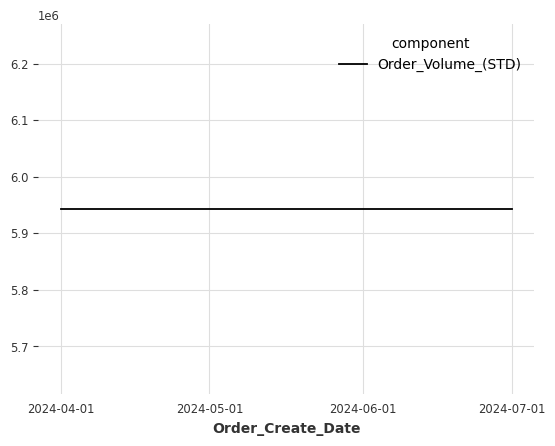

In [90]:
df3.set_index('Order_Create_Date').plot()
plt.xticks(df3['Order_Create_Date'].to_list())

In [133]:

# Given values
actual_values = np.array([[[4872777.4]],

       [[4683638.4]],

       [[3284587.6]],

       [[2855132.2]],

       [[1713398.2]],

       [[1954789. ]],

       [[2425312.4]],

       [[2660091. ]],

       [[3226377.8]],

       [[2852139.6]]])

predicted_values = np.array([[[3304532.2]],

       [[3304532.2]],

       [[3304532.2]],

       [[3304532.2]],

       [[3304532.2]],

       [[3304532.2]],

       [[3304532.2]],

       [[3304532.2]],

       [[3304532.2]],

       [[3304532.2]]])



# Create a DataFrame
data = {
    "actual": actual_values.flatten(),
    "predicted": predicted_values.flatten()
}

df4 = pd.DataFrame(data)

# Print the DataFrame
print(df4)


      actual  predicted
0  4872777.4  3304532.2
1  4683638.4  3304532.2
2  3284587.6  3304532.2
3  2855132.2  3304532.2
4  1713398.2  3304532.2
5  1954789.0  3304532.2
6  2425312.4  3304532.2
7  2660091.0  3304532.2
8  3226377.8  3304532.2
9  2852139.6  3304532.2


In [134]:
df4

,actual,predicted
0,4872777.4,3304532.2
1,4683638.4,3304532.2
2,3284587.6,3304532.2
3,2855132.2,3304532.2
4,1713398.2,3304532.2
5,1954789.0,3304532.2
6,2425312.4,3304532.2
7,2660091.0,3304532.2
8,3226377.8,3304532.2
9,2852139.6,3304532.2


In [135]:
idx=pd.date_range('2023-07-01','2024-04-01',freq='MS')

In [136]:
len(idx)

10

In [137]:
df4.index=idx

In [138]:
df4.index=df4.index.astype(str)

<AxesSubplot:title={'center':'Comparison of Actual vs predict'}, xlabel='order volume', ylabel='Date'>

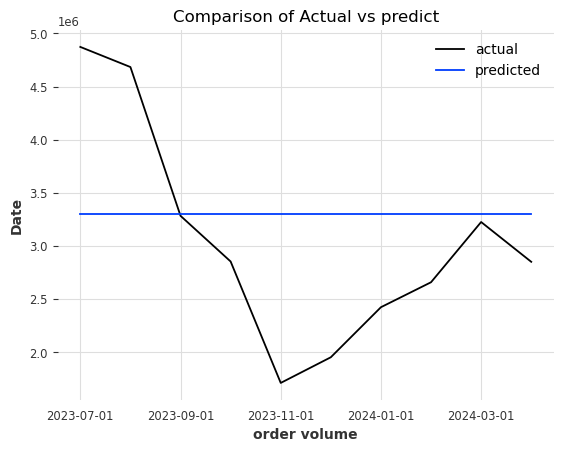

In [139]:
df4.plot(title='Comparison of Actual vs predict',xlabel='order volume',ylabel='Date')

In [18]:
# Extracting necessary columns
df2=df2[['Order Create Date','Region Name','forecast_group','Order Volume (STD)','Product Segment']]
group_key = "Region Name-forecast_group".split('-')
df2[group_key] = df2[group_key].fillna('NA')
df2['group_key'] = df2[group_key].agg('_'.join,axis=1)

In [129]:
df2=df2.loc[df2['Product Segment'].isin(['Exterior','Interior'])]

In [11]:
df3=df2
df3.loc[df3['forecast_group']=='C+ St Plk']['Region Name'].unique()

array(['Carolinas', 'Canada East', 'Canada West', 'Mid Atlantic',
       'Mid South', 'Midwest Central', 'Midwest East', 'Midwest West',
       'Mountain', 'North Atlantic', 'Pacific Northwest', 'Southeast',
       'Southwest', 'Texas and South Plains', 'Alaska'], dtype=object)

In [39]:
df2=df1.set_index('Order_Create_Date')

In [40]:
df2['2024-01-01':].head(23)

,Order_Volume_(STD),group_key,run_id,Region_Name,forecast_group,series_class,model,Holdout_Volume_(STD),mape,smape,mase,winner,lag
Order_Create_Date,,,,,,,,,,,,,
2024-01-01,2.771974e+06,North Atlantic_C+ St Plk,2501620668,North Atlantic,C+ St Plk,ok,RegressionModelL1,NaN,NaN,NaN,NaN,False,1.0
2024-01-01,2.887406e+06,North Atlantic_C+ St Plk,2501620668,North Atlantic,C+ St Plk,ok,NaiveMean,NaN,NaN,NaN,NaN,False,1.0
2024-01-01,3.873866e+06,North Atlantic_C+ St Plk,2501620668,North Atlantic,C+ St Plk,ok,Prophet,NaN,NaN,NaN,NaN,False,1.0
2024-01-01,2.556378e+06,North Atlantic_C+ St Plk,2501620668,North Atlantic,C+ St Plk,ok,NaiveDrift,NaN,NaN,NaN,NaN,False,1.0
2024-01-01,2.553663e+06,North Atlantic_C+ St Plk,2501620668,North Atlantic,C+ St Plk,ok,NaiveSeasonal,NaN,NaN,NaN,NaN,False,1.0
2024-01-01,3.427904e+06,North Atlantic_C+ St Plk,2501620668,North Atlantic,C+ St Plk,ok,XGBoost,NaN,NaN,NaN,NaN,False,1.0
2024-01-01,3.521362e+06,North Atlantic_C+ St Plk,2501620668,North Atlantic,C+ St Plk,ok,BATS,NaN,NaN,NaN,NaN,False,1.0
2024-01-01,3.604751e+06,North Atlantic_C+ St Plk,2501620668,North Atlantic,C+ St Plk,ok,Orbit,NaN,NaN,NaN,NaN,True,1.0
2024-02-01,3.787010e+06,North Atlantic_C+ St Plk,2501620668,North Atlantic,C+ St Plk,ok,BATS,NaN,NaN,NaN,NaN,False,2.0


In [33]:
df2['2024-11-01':].head(25)

,Order_Volume_(STD),group_key,run_id,Region_Name,forecast_group,series_class,model,Holdout_Volume_(STD),mape,smape,mase,winner,lag
Order_Create_Date,,,,,,,,,,,,,
2024-11-01,3.248136e+06,North Atlantic_C+ St Plk,2501620668,North Atlantic,C+ St Plk,ok,Prophet,NaN,NaN,NaN,NaN,False,11.0
2024-11-01,2.513847e+06,North Atlantic_C+ St Plk,2501620668,North Atlantic,C+ St Plk,ok,Orbit,NaN,NaN,NaN,NaN,True,11.0
2024-11-01,2.569951e+06,North Atlantic_C+ St Plk,2501620668,North Atlantic,C+ St Plk,ok,NaiveDrift,NaN,NaN,NaN,NaN,False,11.0
2024-11-01,2.893306e+06,North Atlantic_C+ St Plk,2501620668,North Atlantic,C+ St Plk,ok,RegressionModelL1,NaN,NaN,NaN,NaN,False,11.0
2024-11-01,3.020603e+06,North Atlantic_C+ St Plk,2501620668,North Atlantic,C+ St Plk,ok,XGBoost,NaN,NaN,NaN,NaN,False,11.0
2024-11-01,2.783637e+06,North Atlantic_C+ St Plk,2501620668,North Atlantic,C+ St Plk,ok,BATS,NaN,NaN,NaN,NaN,False,11.0
2024-11-01,2.553663e+06,North Atlantic_C+ St Plk,2501620668,North Atlantic,C+ St Plk,ok,NaiveSeasonal,NaN,NaN,NaN,NaN,False,11.0
2024-11-01,2.887406e+06,North Atlantic_C+ St Plk,2501620668,North Atlantic,C+ St Plk,ok,NaiveMean,NaN,NaN,NaN,NaN,False,11.0
2024-12-01,4.633539e+06,North Atlantic_C+ St Plk,2501620668,North Atlantic,C+ St Plk,ok,Prophet,NaN,NaN,NaN,NaN,False,12.0


In [3]:
from darts.models import Prophet
from darts.models import (
    NaiveSeasonal,
    NaiveDrift,
    NaiveMean,
    ExponentialSmoothing,
    AutoARIMA,
    #StandardRegressionModel,
    Theta,
    FFT,
    Croston,
    LightGBMModel,
    RandomForest,
    RegressionEnsembleModel,
    TBATS,
    BATS,
    RegressionModel)
from darts.metrics import mape, smape, mase
from orbit.models import DLT


starting of paralle.py
paralle.py/parallel is printing


INFO:torch.distributed.nn.jit.instantiator:Created a temporary directory at /tmp/tmpr_ajnrvy
INFO:torch.distributed.nn.jit.instantiator:Writing /tmp/tmpr_ajnrvy/_remote_module_non_scriptable.py


In [4]:
#%% Models to run ###
model_frames = ['Darts','Orbit']
dart_models = [ExponentialSmoothing(), NaiveSeasonal(), NaiveDrift(), NaiveMean(), AutoARIMA(), Theta(), FFT(), Prophet(),Croston(),LightGBMModel(lags=1),RandomForest(lags= 1,random_state=2309),RegressionEnsembleModel(forecasting_models=[ExponentialSmoothing(), NaiveSeasonal(),AutoARIMA(),TBATS()],regression_train_n_points=24),TBATS(),BATS(),RegressionModel(lags=1),RegressionModel(lags=10)]#, StandardRegressionModel()]
dart_models_names = ['ExponentialSmoothing', 'NaiveSeasonal','NaiveDrift','NaiveMean','AutoARIMA','Theta', 'FFT','Prophet','Croston','LightGBMModel','RandomForest','RegressionEnsembleModel','TBATS','BATS','RegressionModelL1','RegressionModelL10']#, 'StandardRegression']
models = [DLT(),ExponentialSmoothing(), NaiveSeasonal(), NaiveDrift(), NaiveMean(), AutoARIMA()]#, Theta(), FFT(), Prophet(),Croston(),LightGBMModel(lags=1),RandomForest(lags= 1,random_state=2309),RegressionEnsembleModel(forecasting_models=[ExponentialSmoothing(), NaiveSeasonal(),AutoARIMA(),TBATS()],regression_train_n_points=24),TBATS(),BATS(),RegressionModel(lags=1),RegressionModel(lags=10)]#, StandardRegressionModel()]
models_names = ['Orbit','ExponentialSmoothing', 'NaiveSeasonal','NaiveDrift','NaiveMean','AutoARIMA']#,'Theta', 'FFT','Prophet','Croston','LightGBMModel','RandomForest','RegressionEnsembleModel','TBATS','BATS','RegressionModelL1','RegressionModelL10']#, 'StandardRegression']
orbit_models = [DLT()]
orbit_models_names = ['DampedLinearTrend']

In [5]:
run_config = utils.read_params_in_from_json('run_config.json')
group_key = run_config['dimensions'].split('-')
#seed(2309)
print(group_key)
run_id = getrandbits(32)
run_date = dt.datetime.today().date()
run_datascientist = run_config['data_scientist']
run_scope = run_config['scope']
run_response = run_config['response']
run_timegrain = run_config['timegrain']
run_dimensions = run_config['dimensions']
run_type = run_config['type']
holdout_horizon = run_config['train_horizon']
forecast_horizon = run_config['forecast_horizon']

test_run = True

write_file = 'yes'

['Region_Name', 'forecast_group']


In [6]:
print('run_id',run_id)
print('run_date',run_date)
print('run_datascientist',run_datascientist)
print('holdout_horizon',holdout_horizon)
print('forecast_horizon',forecast_horizon)

run_id 2569319578
run_date 2023-08-17
run_datascientist shahid_azad
holdout_horizon 5
forecast_horizon 24


In [8]:
prep_comp_prod = pd.read_pickle('prep_init.pkl')
prep_comp_prod.tail()

,Order_Create_Date,Order_Volume_(STD),group_key,run_id
48936,2023-12-01,4046.4,Southwest_C+ Ma HLD,2688014460
48937,2024-01-01,369.6,Southwest_C+ Ma HLD,2688014460
48938,2024-02-01,552.8,Southwest_C+ Ma HLD,2688014460
48939,2024-03-01,929.6,Southwest_C+ Ma HLD,2688014460
48940,2024-04-01,3646.4,Southwest_C+ Ma HLD,2688014460


In [11]:
t_train_start = time.time()
prod_dfs, prod_accs,failed_keys = [],[],[]
#ts_feats = []
## Certain stat models have constraints on length of time series , see later checks##
time_models = ['ExponentialSmoothing']
time_models2 = ['AutoARIMA']
time_models3 = ['RegressionEnsembleModel','TBATS','BATS']
cnt = 0
keys = prep_comp_prod['group_key'].unique()

In [12]:
#key = np.where(keys=='Midwest Central_C+ St Plk')
#keys[key].item()
key = 'Midwest Central_C+ St Plk'

In [13]:
# filter data
prod_df = prep_comp_prod[prep_comp_prod['group_key']==key]
prod_df

,Order_Create_Date,Order_Volume_(STD),group_key,run_id
10246,2015-04-01,1967361.25,Midwest Central_C+ St Plk,2688014460
10247,2015-05-01,1916091.00,Midwest Central_C+ St Plk,2688014460
10248,2015-06-01,2063669.25,Midwest Central_C+ St Plk,2688014460
10249,2015-07-01,1831827.50,Midwest Central_C+ St Plk,2688014460
10250,2015-08-01,1311524.75,Midwest Central_C+ St Plk,2688014460
...,...,...,...,...
10350,2023-12-01,1747686.75,Midwest Central_C+ St Plk,2688014460
10351,2024-01-01,1534704.00,Midwest Central_C+ St Plk,2688014460
10352,2024-02-01,2193432.25,Midwest Central_C+ St Plk,2688014460
10353,2024-03-01,2478356.75,Midwest Central_C+ St Plk,2688014460


In [14]:
models_list = list(zip(models,models_names))
model_dfs, model_accs = [],[]

In [15]:
models_list

[(<orbit.forecaster.full_bayes.FullBayesianForecaster at 0x7fb7d1cc4e90>,
  'Orbit'),
 (ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=False, seasonal=SeasonalityMode.ADDITIVE, seasonal_periods=None, random_state=0),
  'ExponentialSmoothing'),
 (NaiveSeasonal(K=1), 'NaiveSeasonal'),
 (NaiveDrift(), 'NaiveDrift'),
 (NaiveMean(), 'NaiveMean'),
 (AutoARIMA(add_encoders=None), 'AutoARIMA')]

In [16]:
run_mofcst = dt.datetime(run_config['current_year'],run_config['current_month'],1)
train_date = run_mofcst + relativedelta(months=-holdout_horizon)

In [23]:
print('train_date',train_date)
print('run_mofcst',run_mofcst)

train_date 2023-12-01 00:00:00
run_mofcst 2024-05-01 00:00:00


In [17]:
log_file_path = path.join(path.dirname(path.abspath('params/log.conf')), 'log.conf')
jhds_logger = utils.setup_logger(log_file_path)
jhds_logger.info('Finished setup')

In [18]:
start_time = time.perf_counter()
for model,name in list(zip(models,models_names)):
    #### Instantiate model framework
    if (name == 'Orbit'):
        model_frame = Orbit(model,prod_df,run_mofcst,train_date=train_date,forecast_horizon=None)
    else:
        model_frame = Darts(model,prod_df, run_mofcst, train_date,forecast_horizon=None)
    #print(model_frame)

    #### Create time series
    #prod_ts = pre_process.create_ts(prod_df,run_mofcst)
    model_frame.prep_data()

    #### Split train and test sets for holdout accuracy
    #train,val = prod_ts.split_before(pd.Timestamp(train_date))
    model_frame.split_data()
    #TODO create fit function (returns model params)
    # check for length , Expo can't handle less than 24, autoarima needs 30
    if ( (len(model_frame.train)<24) & (name in time_models) ):
        failed_keys.append((key,name))
        continue
    elif ( (len(model_frame.train)<30) & (name in time_models2)) :
        failed_keys.append((key,name))
        continue
    elif ( (name in time_models3) & (model_frame.get_train_df_ordervol().tail(12).sum()<12) ):
        failed_keys.append((key,name))
        continue
    #### Fit and pred ##
    t_modelfitpred_start = time.time()
    try:
        model_frame.train_model()
        #model.fit(train)
    except ZeroDivisionError:
        jhds_logger.error(f'A zero division error occurred with key {key} in training model {name}')

    try:
        pred = model_frame.pred_model()
        #pred = model.predict(len(val))
    except ValueError:
        jhds_logger.error(f'Training model {name} with key {key} failed due to NaN, infinity or too large number')

    pred_df = pred.pd_dataframe()
    pred_df['model'] = name
    pred_df.rename(columns={'0':'fcst'},inplace=True)
    model_dfs.append(pred_df)
    #### Accuracies ##
    accuracies = pd.DataFrame()
    accuracies['mape'] = pd.Series(mape(model_frame.val,pred))
    accuracies['smape'] = pd.Series(smape(model_frame.val,pred))
    accuracies['mase'] = pd.Series(mase(model_frame.val,pred,insample=model_frame.train))
    accuracies['model'] = name
    model_accs.append(accuracies)
    t_modelfitpred_end = time.time()
    jhds_logger.info(f'Finished fitting model {name}, it took {"{:.2f}".format((t_modelfitpred_end-t_modelfitpred_start)/60)} minutes')
finish_time = time.perf_counter()
print(f"Program finished in {finish_time-start_time} seconds")
print(model_dfs, model_accs)

model is training now fit_model/Orbit/train_model <orbit.forecaster.full_bayes.FullBayesianForecaster object at 0x7fb7d11c1750>


parallel/delayed is printing
parallel/delayed is printing
model is training now fit_model/Darts/train_model ExponentialSmoothing()
parallel/delayed is printing
parallel/delayed is printing
model is training now fit_model/Darts/train_model NaiveSeasonal()
parallel/delayed is printing
parallel/delayed is printing
model is training now fit_model/Darts/train_model NaiveDrift()
parallel/delayed is printing
parallel/delayed is printing
model is training now fit_model/Darts/train_model NaiveMean()
parallel/delayed is printing
parallel/delayed is printing
model is training now fit_model/Darts/train_model AutoARIMA()


/home/shahid/anaconda3/envs/jameshardie/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


parallel/delayed is printing
parallel/delayed is printing
Program finished in 3.034291146999749 seconds
[component          Order_Volume_(STD)  model
Order_Create_Date                           
2023-12-01               2.451679e+06  Orbit
2024-01-01               2.469601e+06  Orbit
2024-02-01               2.350747e+06  Orbit
2024-03-01               2.477421e+06  Orbit
2024-04-01               2.107309e+06  Orbit, component          Order_Volume_(STD)                 model
Order_Create_Date                                          
2023-12-01               2.594438e+06  ExponentialSmoothing
2024-01-01               2.314034e+06  ExponentialSmoothing
2024-02-01               2.339418e+06  ExponentialSmoothing
2024-03-01               2.456159e+06  ExponentialSmoothing
2024-04-01               2.204377e+06  ExponentialSmoothing, component          Order_Volume_(STD)          model
Order_Create_Date                                   
2023-12-01                 1313500.75  NaiveSeasonal

In [19]:
keys = ['Midwest Central_C+ St Plk', 'Midwest Central_Pr Plk']

In [22]:
# with open('keys.pkl', 'rb') as f:
#     keys = pickle.load(f)

In [20]:
keys

['Midwest Central_C+ St Plk', 'Midwest Central_Pr Plk']

In [17]:
list(zip(models,models_names))

[(<orbit.forecaster.full_bayes.FullBayesianForecaster at 0x7f3f3e67e350>,
  'Orbit'),
 (ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=False, seasonal=SeasonalityMode.ADDITIVE, seasonal_periods=None, random_state=0),
  'ExponentialSmoothing'),
 (NaiveSeasonal(K=1), 'NaiveSeasonal'),
 (NaiveDrift(), 'NaiveDrift'),
 (NaiveMean(), 'NaiveMean'),
 (AutoARIMA(add_encoders=None), 'AutoARIMA')]

In [21]:
start_time = time.perf_counter()
for key in keys :
    cnt +=1
    len_keys = len(keys)
    jhds_logger.info(f'Working on item : {key}, key {cnt} out of {len_keys} ')
    prod_df = prep_comp_prod[prep_comp_prod['group_key']==key]

    #### Cycle through models ###
    t_model_start = time.time()
    #jhds_logger.info(f'Cycling through models for {key} ')
    model_dfs, model_accs = [],[]
    seed(2309)
    for model,name in list(zip(models,models_names)):
        #### Instantiate model framework
        if (name == 'Orbit'):
            model_frame = Orbit(model,prod_df,run_mofcst,train_date=train_date,forecast_horizon=None)
        else:
            model_frame = Darts(model,prod_df, run_mofcst, train_date,forecast_horizon=None)
        #print(model_frame)

        #### Create time series
        #prod_ts = pre_process.create_ts(prod_df,run_mofcst)
        model_frame.prep_data()

        #### Split train and test sets for holdout accuracy
        #train,val = prod_ts.split_before(pd.Timestamp(train_date))
        model_frame.split_data()
        #TODO create fit function (returns model params)
        # check for length , Expo can't handle less than 24, autoarima needs 30
        if ( (len(model_frame.train)<24) & (name in time_models) ):
            failed_keys.append((key,name))
            continue
        elif ( (len(model_frame.train)<30) & (name in time_models2)) :
            failed_keys.append((key,name))
            continue
        elif ( (name in time_models3) & (model_frame.get_train_df_ordervol().tail(12).sum()<12) ):
            failed_keys.append((key,name))
            continue
        #### Fit and pred ##
        t_modelfitpred_start = time.time()
        try:
            model_frame.train_model()
            #model.fit(train)
        except ZeroDivisionError:
            jhds_logger.error(f'A zero division error occurred with key {key} in training model {name}')

        try:
            pred = model_frame.pred_model()
            #pred = model.predict(len(val))
        except ValueError:
            jhds_logger.error(f'Training model {name} with key {key} failed due to NaN, infinity or too large number')

        pred_df = pred.pd_dataframe()
        pred_df['model'] = name
        pred_df.rename(columns={'0':'fcst'},inplace=True)
        model_dfs.append(pred_df)
        #### Accuracies ##
        accuracies = pd.DataFrame()
        accuracies['mape'] = pd.Series(mape(model_frame.val,pred))
        accuracies['smape'] = pd.Series(smape(model_frame.val,pred))
        accuracies['mase'] = pd.Series(mase(model_frame.val,pred,insample=model_frame.train))
        accuracies['model'] = name
        model_accs.append(accuracies)
        t_modelfitpred_end = time.time()
        jhds_logger.info(f'Finished fitting model {name}, it took {"{:.2f}".format((t_modelfitpred_end-t_modelfitpred_start)/60)} minutes')

    accs_df = pd.concat(model_accs)
    accs_df['group_key'] = key
    models_df = pd.concat(model_dfs)
    models_df['group_key'] = key
    prod_dfs.append(models_df)
    prod_accs.append(accs_df)
    #t_inner.toc('Product Model fit and preds took ')
    t_model_end = time.time()
    jhds_logger.info(f'Finished cycling through models for key: {key}, cycle took {"{:.2f}".format((t_model_end-t_model_start)/60)} minutes')

accs_list_file = 'accs_list.pkl'
preds_list_file = 'preds_list.pkl'
with open(accs_list_file,'wb') as f:
    pickle.dump(prod_accs,f)
with open(preds_list_file,'wb') as f:
    pickle.dump(prod_dfs,f)
jhds_logger.info('Pickled accuracies and predictions in holdout')
prods_mods_df = pd.concat(prod_dfs).reset_index()
prods_accs_df = pd.concat(prod_accs)

## Failed logging ##
failed_df = pd.DataFrame({'group_key':failed_keys})

###
holdout_accs = prods_accs_df.set_index(['model','group_key']).reset_index()
failed_accuracy = holdout_accs[holdout_accs['smape'].isnull()][['group_key','model']]
failed_accuracy['fail_point'] = 'accuracy_calc'
failed_df = pd.concat([failed_df,failed_accuracy])
holdout_accs = holdout_accs.dropna(subset=['smape'])
finish_time = time.perf_counter()
print(f"Program finished in {finish_time-start_time} seconds")

model is training now fit_model/Orbit/train_model <orbit.forecaster.full_bayes.FullBayesianForecaster object at 0x7fb7d11c83d0>
parallel/delayed is printing
parallel/delayed is printing
model is training now fit_model/Darts/train_model ExponentialSmoothing()
parallel/delayed is printing
parallel/delayed is printing
model is training now fit_model/Darts/train_model NaiveSeasonal()
parallel/delayed is printing
parallel/delayed is printing
model is training now fit_model/Darts/train_model NaiveDrift()
parallel/delayed is printing
parallel/delayed is printing
model is training now fit_model/Darts/train_model NaiveMean()
parallel/delayed is printing
parallel/delayed is printing
model is training now fit_model/Darts/train_model AutoARIMA()


/home/shahid/anaconda3/envs/jameshardie/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


parallel/delayed is printing
parallel/delayed is printing
model is training now fit_model/Orbit/train_model <orbit.forecaster.full_bayes.FullBayesianForecaster object at 0x7fb7d11924d0>
parallel/delayed is printing
parallel/delayed is printing
model is training now fit_model/Darts/train_model ExponentialSmoothing()
parallel/delayed is printing
parallel/delayed is printing
model is training now fit_model/Darts/train_model NaiveSeasonal()
parallel/delayed is printing
parallel/delayed is printing
model is training now fit_model/Darts/train_model NaiveDrift()
parallel/delayed is printing
parallel/delayed is printing
model is training now fit_model/Darts/train_model NaiveMean()
parallel/delayed is printing
parallel/delayed is printing


/home/shahid/anaconda3/envs/jameshardie/lib/python3.7/site-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning,


model is training now fit_model/Darts/train_model AutoARIMA()
parallel/delayed is printing
parallel/delayed is printing
Program finished in 6.232601464999789 seconds


In [24]:
prod_dfs

[component          Order_Volume_(STD)                 model                  group_key
 Order_Create_Date                                                                     
 2023-12-01               2.451679e+06                 Orbit  Midwest Central_C+ St Plk
 2024-01-01               2.469601e+06                 Orbit  Midwest Central_C+ St Plk
 2024-02-01               2.350747e+06                 Orbit  Midwest Central_C+ St Plk
 2024-03-01               2.477421e+06                 Orbit  Midwest Central_C+ St Plk
 2024-04-01               2.107309e+06                 Orbit  Midwest Central_C+ St Plk
 2023-12-01               2.594438e+06  ExponentialSmoothing  Midwest Central_C+ St Plk
 2024-01-01               2.314034e+06  ExponentialSmoothing  Midwest Central_C+ St Plk
 2024-02-01               2.339418e+06  ExponentialSmoothing  Midwest Central_C+ St Plk
 2024-03-01               2.456159e+06  ExponentialSmoothing  Midwest Central_C+ St Plk
 2024-04-01               2.2043